In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path_matches = 'IPL_data/matches.csv'
matches_data = pd.read_csv(file_path_matches)
matches_data

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# 
#Below we graph the players who have won the most player of the matches with the y axis being the number awarded and he x axis are the name of the players

[Text(0.5, 1.0, 'Player of Match'),
 Text(0.5, 0, 'player'),
 Text(0, 0.5, 'no. awarded')]

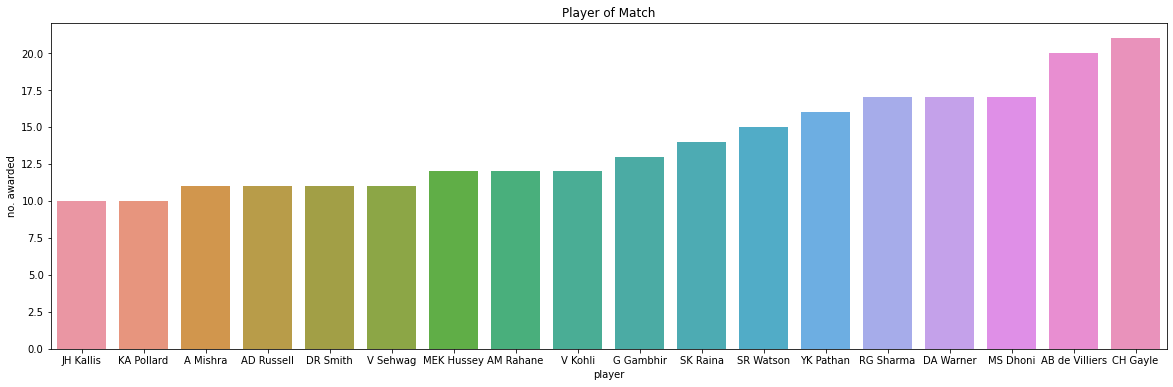

In [3]:
player_of_match = matches_data.groupby('player_of_match').player_of_match.count().sort_values()
player_match_9_plus = player_of_match.loc[ player_of_match > 9]

plt.figure(figsize=(20,6))

#sns.distplot(a = player_mtach_9_plus)
sns.barplot(x=player_match_9_plus.index, y=player_match_9_plus).set(title = 'Player of Match', xlabel ='player', ylabel = 'no. awarded')

In [4]:
file_deliveries = 'IPL_data/deliveries.csv'
deliviries_data =  pd.read_csv(file_deliveries)

deliviries_data[deliviries_data['wide_runs'] > 0]




,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
78,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,13,5,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
107,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,3,Yuvraj Singh,DJ Hooda,A Choudhary,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
108,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,4,Yuvraj Singh,DJ Hooda,A Choudhary,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
146,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,4,4,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178888,11415,1,Mumbai Indians,Chennai Super Kings,10,2,Ishan Kishan,AS Yadav,DJ Bravo,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
178988,11415,2,Chennai Super Kings,Mumbai Indians,6,5,SR Watson,SK Raina,SL Malinga,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
178993,11415,2,Chennai Super Kings,Mumbai Indians,7,3,SK Raina,SR Watson,MJ McClenaghan,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
179006,11415,2,Chennai Super Kings,Mumbai Indians,9,3,SR Watson,SK Raina,MJ McClenaghan,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN


In [5]:

#Malinga deliveries
bowler_Malinga = deliviries_data[deliviries_data['bowler'] == 'SL Malinga']
#Malinga_wicket_tpes
Malinga_dismissal_type = bowler_Malinga.groupby('dismissal_kind')
Malinga_wicket_tpes = Malinga_dismissal_type.dismissal_kind.count().sort_values()



#Total runs given
Malinga_total_runs = bowler_Malinga.total_runs.sum()- bowler_Malinga.wide_runs.sum()
#Total wickets
Malinga_total_wickets = Malinga_wicket_tpes.drop(labels = 'run out' ).sum()
#Malinga average
Malinga_avg = Malinga_total_runs/Malinga_total_wickets


In [6]:
bowlers = deliviries_data.bowler.unique()
def finding_avg_bowlers(list_of_bowlers, data_on_bowlers):
    bowler_avgs ={}
    for bowlername in list_of_bowlers:
        bowler_bowlername =  deliviries_data[data_on_bowlers['bowler'] == bowlername]
        bowlername_total_runs = bowler_bowlername.total_runs.sum()- bowler_bowlername.wide_runs.sum()
        bowlername_dismissal_type = bowler_bowlername.groupby('dismissal_kind')
        bowlername_wicket_types = bowlername_dismissal_type.dismissal_kind.count().sort_values()
        if 'run out' in bowlername_wicket_types:
            bowlername_total_wickets = bowlername_wicket_types.drop(labels = 'run out' ).sum()
        else:
            bowlername_total_wickets = bowlername_wicket_types.sum()
        if bowlername_total_wickets > 0:
            bowlername_avg = bowlername_total_runs/bowlername_total_wickets
            bowler_avgs[bowlername] = bowlername_avg
        else:
            bowler_avgs[bowlername] = 0
    return bowler_avgs

bowlers_avg = finding_avg_bowlers(bowlers, deliviries_data)
bowlers_avg = sorted(bowlers_avg.items(), key=lambda x: x[1], reverse=True)

In [7]:
bowlers = list(bowlers)

file_Players = 'IPL_data/Players.csv'
Players_data =  pd.read_csv(file_Players)


types_of_players = list(Players_data.Bowling_Skill.unique())



In [8]:
Players_data_type = Players_data.drop([ 'DOB', 'Batting_Hand', 'Country'], axis= 1)

#data = {'bowlers': bowlers,  }

Players_data_type = Players_data_type.rename(columns = {'Bowling_Skill': 'Bowling_Type'})

Players_data_type = Players_data_type.rename(columns = {'Player_Name': 'bowler'})

Players_data_type = Players_data_type.dropna(how = 'any')

bowler_type_deliveries = deliviries_data.merge(Players_data_type, how = 'left', on= 'bowler')

test = bowler_type_deliveries.groupby('Bowling_Type') 
bowler_type_deliveries

    

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,Bowling_Type
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Left-arm fast
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Left-arm fast
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,Left-arm fast
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Left-arm fast
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,Left-arm fast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,1,0,1,NaN,NaN,NaN,Right-arm fast
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,2,0,2,NaN,NaN,NaN,Right-arm fast
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,Right-arm fast
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,2,0,2,NaN,NaN,NaN,Right-arm fast


In [9]:
bowling_wickets = {}
for bowling_style in types_of_players:
    delveries_type = bowler_type_deliveries.loc[bowler_type_deliveries['Bowling_Type'] == bowling_style]
    only_wickets = delveries_type.dismissal_kind.dropna(how = 'all')
    wickets = only_wickets.count()
    bowling_wickets[str(bowling_style)] = wickets

bowling_wickets

{'Right-arm medium': 1496,
 'Right-arm offbreak': 999,
 'Left-arm fast-medium': 594,
 'Right-arm fast-medium': 1184,
 'nan': 0,
 'Right-arm fast': 925,
 'Legbreak googly': 530,
 'Legbreak': 446,
 'Left-arm medium-fast': 367,
 'Slow left-arm orthodox': 899,
 'Right-arm medium-fast': 999,
 'Left-arm medium': 171,
 'Left-arm fast': 148,
 'Slow left-arm chinaman': 76,
 'Right-arm bowler': 0,
 'Right-arm Medium': 0,
 'Right-arm Fast': 0}

In [10]:
bowling_wickets = {}
for bowling_style in types_of_players:
    delveries_type = bowler_type_deliveries.loc[bowler_type_deliveries['Bowling_Type'] == bowling_style]
    only_wickets = delveries_type.dismissal_kind.dropna(how = 'all')
    wickets = only_wickets.count()
    bowling_wickets[str(bowling_style)] = wickets

bowling_wickets.pop('Right-arm Fast')
bowling_wickets.pop('Right-arm Medium')
bowling_wickets.pop('Right-arm bowler')
bowling_wickets.pop('nan')
bowling_wickets.pop('Slow left-arm chinaman')
bowling_wickets.pop('Left-arm fast')
bowling_wickets.pop('Left-arm medium')
bowling_wickets.pop('Left-arm medium-fast')
#bowling_wickets.pop('Legbreak')

367

[Text(0.5, 1.0, 'Wickets by bowler type'),
 Text(0.5, 0, 'type of bowler'),
 Text(0, 0.5, 'no. of wickets')]

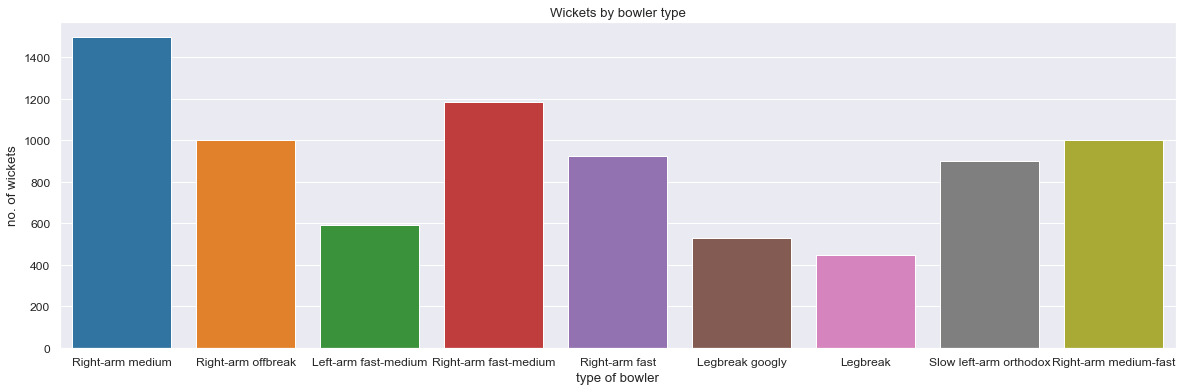

In [11]:
#fig, ax = plt.subplots()

plt.figure(figsize=(20,6))

#types of wickets 

sns.set_theme(palette = 'tab10', font_scale = 1.1)

sns.barplot(x=list(bowling_wickets.keys()), y=list(bowling_wickets.values())).set(title= 'Wickets by bowler type', xlabel = 'type of bowler', ylabel='no. of wickets')

#
Below we graph the types of wickets Malinga gets 

[Text(0.5, 1.0, 'Malinga by wicket type'), Text(0, 0.5, 'number of wickets')]

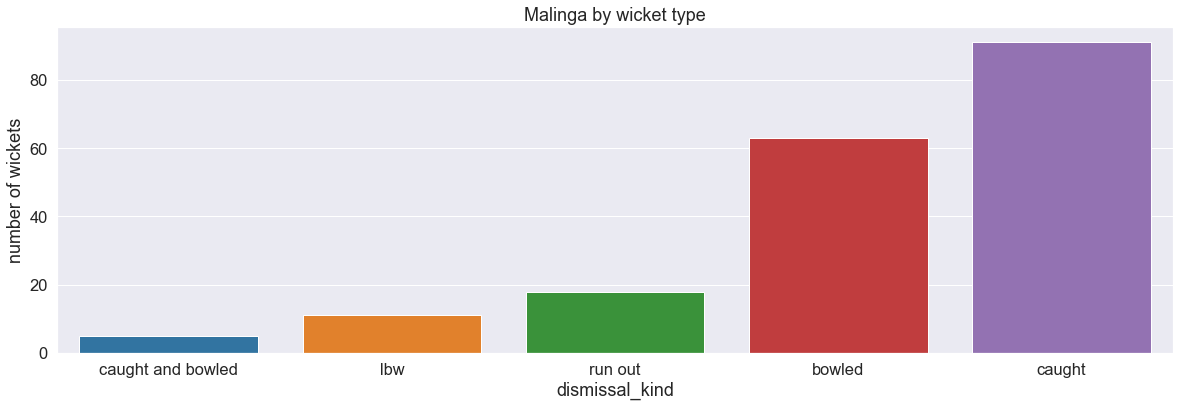

In [12]:
plt.figure(figsize=(20,6))

sns.set_theme(palette = 'tab10', font_scale = 1.5)


#types of wickets 
sns.barplot(x=Malinga_wicket_tpes.index, y=Malinga_wicket_tpes).set(title = 'Malinga by wicket type', ylabel = 'number of wickets')

In [13]:
#batsman by balls played
batsman_data = deliviries_data.groupby('batsman')
batsman_balls_faced = batsman_data.batsman.count().sort_values()
batsman_balls_faced_2200_plus = batsman_balls_faced.loc[batsman_balls_faced>2200]

#bowler by wickets including runout 
bowler = deliviries_data.groupby('bowler')
bowler_wickets = bowler.player_dismissed.count().sort_values()
#bowler by wickets for those over a 100
bowler_wickets_100_plus = bowler_wickets.loc[bowler_wickets>100]

#dismissal_kind
dismiss = deliviries_data.groupby('dismissal_kind')
dismissal_type = dismiss.dismissal_kind.count().sort_values()


#dismissal_kind_avg
dismissal_kind_avg = dismissal_type/405

bowler_wickets_total = bowler.player_dismissed.count()

In [14]:
#Calculating Total Runs

batsmen = deliviries_data.batsman.unique()

def scored_runs (list_of_batsmen, data):
    batsman_total ={}
    for battername in list_of_batsmen:
        batter_battername = deliviries_data[data['batsman'] == battername]
        battername_total_runs = batter_battername.batsman_runs.sum()
        batsman_total[battername] = battername_total_runs
    return  batsman_total  

batting_totals = scored_runs(batsmen,deliviries_data)
Batter_total_series = pd.Series(batting_totals)
Batter_total_series_top = Batter_total_series.loc[Batter_total_series>3000] 
Batter_total_series_top = Batter_total_series_top.sort_values(ascending = True)


In [15]:
dismissal_type.head(10)

dismissal_kind
obstructing the field       2
hit wicket                 10
retired hurt               12
caught and bowled         211
stumped                   278
lbw                       540
run out                   852
bowled                   1581
caught                   5348
Name: dismissal_kind, dtype: int64

# 
#Here we graph how all wickets were gained 

[Text(0.5, 1.0, 'total wickets by type of dismissal'),
 Text(0.5, 0, 'no. of wickets')]

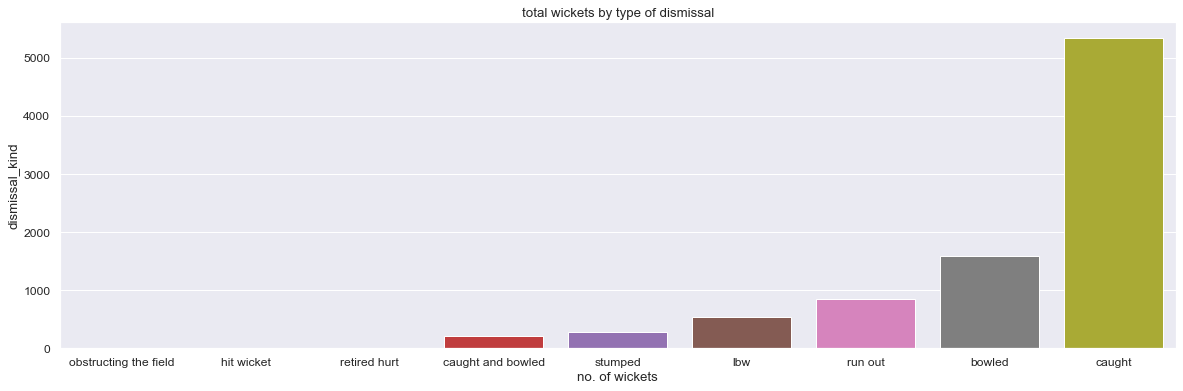

In [16]:
plt.figure(figsize=(20,6))

#dismissal_type.pop('obstructing the field')

#dismissal_type = dismissal_type.truncate(2, 5, copy = False)

#dismissal_type.pop('retired hurt')

sns.set_theme(palette = 'tab10', font_scale = 1.1)

#types of wickets total 
sns.barplot(x=dismissal_type.index, y=dismissal_type).set(title = 'total wickets by type of dismissal', xlabel = 'no. of wickets')



# 
#Here we graph how the average bowlers wickets are distributed

<AxesSubplot:xlabel='dismissal_kind', ylabel='dismissal_kind'>

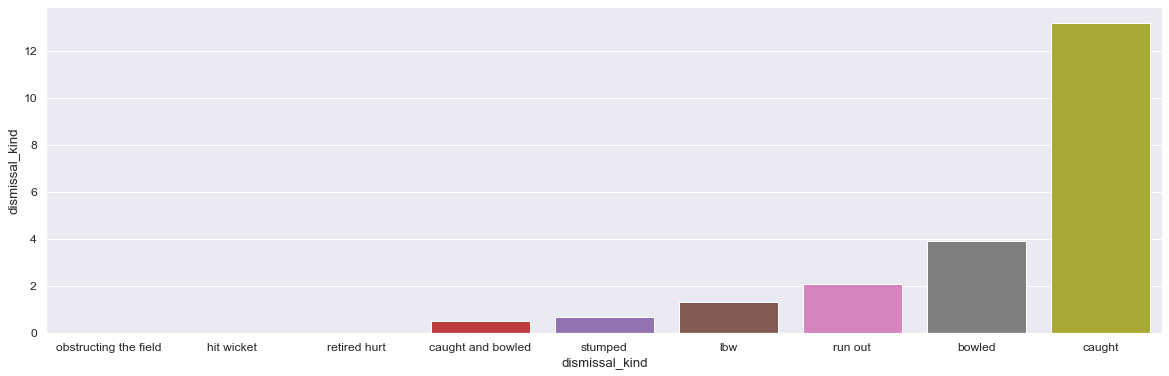

In [17]:
plt.figure(figsize=(20,6))

#avg types of wickets 
sns.barplot(x=dismissal_kind_avg.index, y=dismissal_kind_avg)

# 
#A graph of top wicket takers

[Text(0.5, 1.0, 'Highest wicket takers'), Text(0, 0.5, 'no. of wickets')]

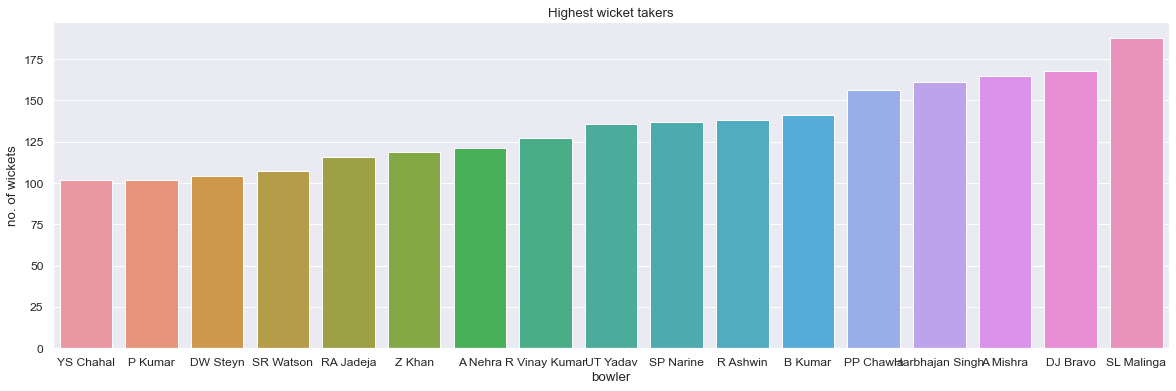

In [18]:
plt.figure(figsize=(20,6))

#highest wicket takers
sns.barplot(x=bowler_wickets_100_plus.index, y=bowler_wickets_100_plus).set(title = 'Highest wicket takers', ylabel = 'no. of wickets')

# 
#A graph of top run scorers

[Text(0.5, 1.0, 'Highest run scorer'),
 Text(0, 0.5, 'no. of runs'),
 Text(0.5, 0, 'batters')]

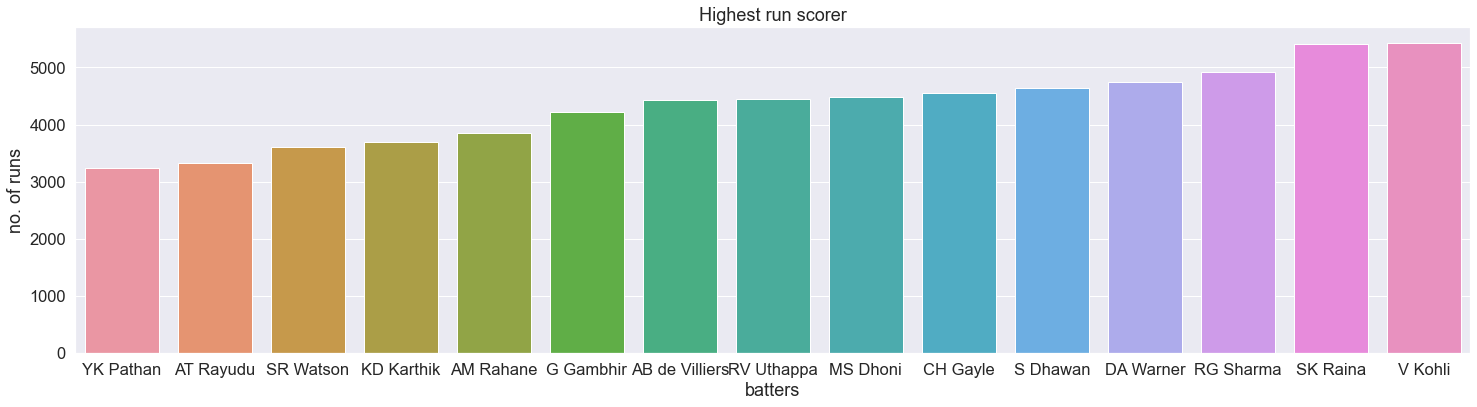

In [19]:
#top run scorers
plt.figure(figsize=(25,6))

sns.set_theme(font_scale = 1.5)

sns.barplot(x=Batter_total_series_top.index, y=Batter_total_series_top).set(title = 'Highest run scorer', ylabel = 'no. of runs', xlabel = 'batters')

#
Creating a table of player stats 

In [20]:
#calculating strike rates

def avg_in_innings(inning, ball_data):
    if inning == 1:
        innings_1_data = ball_data[ball_data['inning'] == 1]
        batsmen = innings_1_data.batsman.unique()
        batsman_total_1 ={}
        for battername in batsmen:
            batter_battername = innings_1_data[innings_1_data['batsman'] == battername]
            battername_total_runs = batter_battername.batsman_runs.sum()
            batsman_balls_1_faced = batter_battername.batsman.count()
            batsman_total_1[battername] = battername_total_runs/batsman_balls_1_faced*100
        return  batsman_total_1 
    if inning == 2:
        innings_2_data = ball_data[ball_data['inning'] == 2]
        batsmen = innings_2_data.batsman.unique()
        batsman_total_2 ={}
        for battername in batsmen:
            batter_battername = innings_2_data[innings_2_data['batsman'] == battername]
            battername_total_runs = batter_battername.batsman_runs.sum() 
            batsman_balls_2_faced = batter_battername.batsman.count()
            batsman_total_2[battername] = battername_total_runs/batsman_balls_2_faced*100
        return  batsman_total_2  

batting_avg_1 = avg_in_innings(1,deliviries_data)
batting_avg_2 = avg_in_innings(2,deliviries_data)

index = sorted(list(deliviries_data.batsman.unique()))

overall_strk_rt  = []
for battername in index:
    batter_battername = deliviries_data[deliviries_data['batsman'] == battername]
    battername_total_runs = batter_battername.batsman_runs.sum()
    batsman_balls_faced = batter_battername.batsman.count()
    avg = battername_total_runs/batsman_balls_faced *100
    overall_strk_rt.append(avg)
    
list_batting_strk_1 = [] 
for batter in index:
    if batter in sorted(batting_avg_1):
        list_batting_strk_1.append(batting_avg_1[batter])
    else:
        list_batting_strk_1.append(0)

list_batting_strk_2 = [] 
for batter in index:
    if batter in sorted(batting_avg_2):
        list_batting_strk_2.append(batting_avg_2[batter])
    else:
        list_batting_strk_2.append(0)


In [21]:
#Calculating Average

avg_list = []
for battername in index:
    batter_battername = deliviries_data[deliviries_data['batsman'] == battername]
    battername_total_runs = batter_battername.batsman_runs.sum()
    batter_outs = deliviries_data[deliviries_data['player_dismissed'] == battername].inning.count()
    if batter_outs > 0:
        avg_list.append(battername_total_runs/batter_outs)
    else:
        avg_list.append(0)





In [22]:
#Generating player stats
list_of_players = index
data = { 'player' : index, 'strike_rate_inning_1': list_batting_strk_1,'strike_rate_inning_2':  list_batting_strk_2, 'overall_strike_rate': overall_strk_rt, 'batting_average': avg_list  }

Player_stats = pd.DataFrame.from_dict(data)

Player_stats = Player_stats.set_index('player')

#Difference in strike rate 

Innings_2_minus_1 = (Player_stats['strike_rate_inning_2'] - Player_stats['strike_rate_inning_1'])

Player_stats['Innings_2_minus_1'] = Innings_2_minus_1

Player_stats


,strike_rate_inning_1,strike_rate_inning_2,overall_strike_rate,batting_average,Innings_2_minus_1
player,,,,,
A Ashish Reddy,144.347826,140.740741,142.857143,18.666667,-3.607085
A Chandila,57.142857,0.000000,57.142857,0.000000,-57.142857
A Chopra,70.833333,66.666667,70.666667,8.833333,-4.166667
A Choudhary,125.000000,125.000000,125.000000,25.000000,0.000000
A Dananjaya,80.000000,0.000000,80.000000,0.000000,-80.000000
...,...,...,...,...,...
YV Takawale,101.639344,106.557377,104.918033,24.000000,4.918033
Yashpal Singh,61.904762,73.913043,70.149254,11.750000,12.008282
Younis Khan,0.000000,42.857143,42.857143,3.000000,42.857143


#
Top players by batting average

[Text(0.5, 1.0, 'Batters with highest batting avg')]

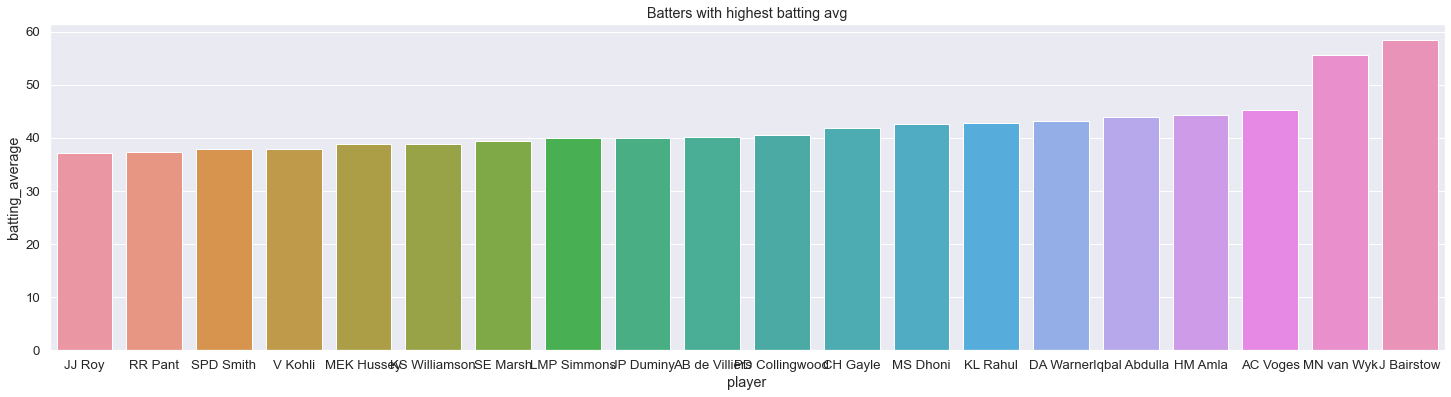

In [23]:
#batter avg of greater than 35

batter_avg_37plus = Player_stats[Player_stats['batting_average'] >= 37]
batter_avg_37plus_sorted = batter_avg_37plus.batting_average.sort_values( )



#batter_avg_graph
plt.figure(figsize=(25,6))

sns.set_theme(font_scale = 1.2)

sns.barplot(x=batter_avg_37plus_sorted.index, y=batter_avg_37plus_sorted).set(title = 'Batters with highest batting avg')

#
Top players by overall strike rate 

[Text(0.5, 1.0, 'Highest strike rates')]

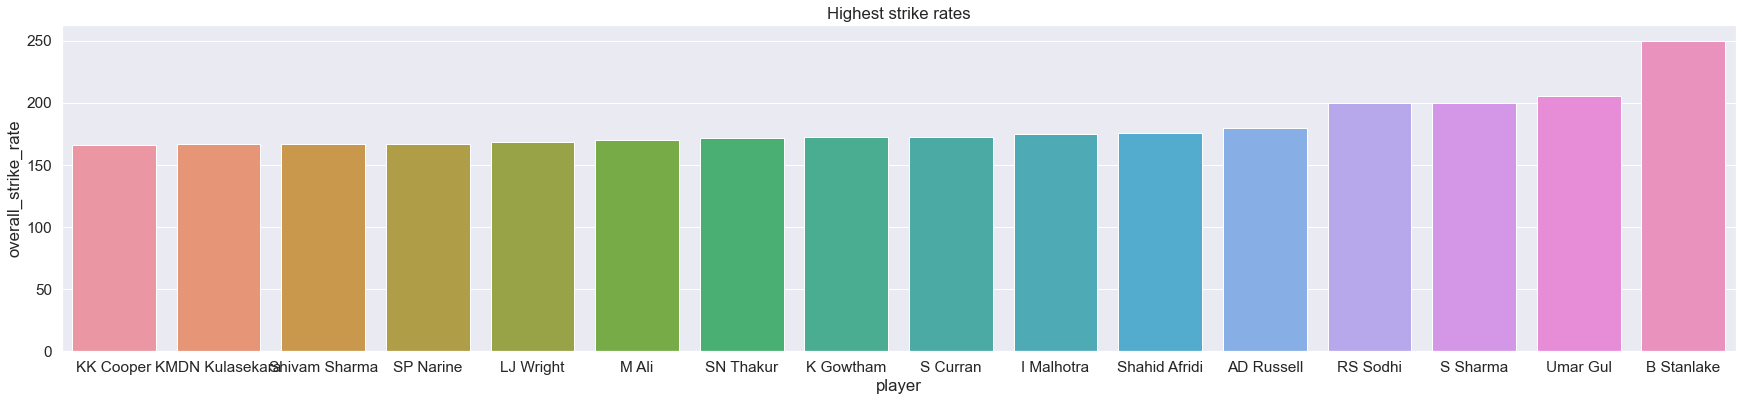

In [24]:
#strike rate of greater than 130

batter_strkrate_165plus = Player_stats[Player_stats['overall_strike_rate'] >= 165]
batter_strkrate_165plus_sorted = batter_strkrate_165plus.overall_strike_rate.sort_values( )



#batter_avg_graph
plt.figure(figsize=(30,6))

sns.set_theme(font_scale = 1.4)

sns.barplot(x=batter_strkrate_165plus_sorted.index, y=batter_strkrate_165plus_sorted).set(title = 'Highest strike rates')

#
#Player stats organised by number of runs  

In [25]:
file_path_matches = 'IPL_data/most_runs_average_strikerate.csv'
runs_data = pd.read_csv(file_path_matches)
runs_data

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


In [26]:
pom_awards = matches_data.groupby('player_of_match').player_of_match.count()


In [27]:

#for player in runs_data:
    #matches_data.groupby('player_of_match').player_of_match.count()

runs_data_players = matches_data.groupby('player_of_match').player_of_match.count()

runs_data_players = runs_data_players.to_frame()

runs_data_players = runs_data_players.rename(columns= {'player_of_match': 'num_of_awards'})


In [28]:
runs_data_index = runs_data_players.reset_index()



In [29]:
batsman = runs_data.sort_values(by = ['batsman']).batsman

print(len(runs_data))

runs_data

runs_data_index

516


,player_of_match,num_of_awards
0,A Chandila,1
1,A Joseph,1
2,A Kumble,3
3,A Mishra,11
4,A Nehra,6
...,...,...
221,Washington Sundar,1
222,YK Pathan,16
223,YS Chahal,1
224,Yuvraj Singh,5


In [30]:
batsman_sorted = runs_data.sort_values(by = ['batsman']).reset_index().drop(['index'], axis = 1)
batsman_sorted
runs_data_index = runs_data_index.rename(columns= {'player_of_match' : 'batsman'} )

In [31]:
runs_data_index.rename(columns= {'player_of_match' : 'batsman'} )

batsman_stats =  batsman_sorted.merge(runs_data_index, how='left', on='batsman') 

batsman_stats = batsman_stats.fillna(value={'num_of_awards': 0})

batsman_stats 

,batsman,total_runs,out,numberofballs,average,strikerate,num_of_awards
0,A Ashish Reddy,280,15,191,18.666667,146.596859,0.0
1,A Chandila,4,1,7,4.000000,57.142857,1.0
2,A Chopra,53,5,71,10.600000,74.647887,0.0
3,A Choudhary,25,2,20,12.500000,125.000000,0.0
4,A Dananjaya,4,0,5,NaN,80.000000,0.0
...,...,...,...,...,...,...,...
511,YV Takawale,192,8,178,24.000000,107.865169,0.0
512,Yashpal Singh,47,4,66,11.750000,71.212121,0.0
513,Younis Khan,3,1,7,3.000000,42.857143,0.0
514,Yuvraj Singh,2755,109,2121,25.275229,129.891561,5.0


In [32]:
batsman

146    A Ashish Reddy
454        A Chandila
280          A Chopra
339       A Choudhary
455       A Dananjaya
            ...      
165       YV Takawale
291     Yashpal Singh
473       Younis Khan
19       Yuvraj Singh
216            Z Khan
Name: batsman, Length: 516, dtype: object

In [33]:
ols_model = LinearRegression()

regressors = ['out', 'strikerate', 'numberofballs']

runs_data_nonna = runs_data.dropna()

X = runs_data_nonna[regressors]
y = runs_data_nonna.total_runs

ols_model.fit(X, y)


ols_model_full = [ols_model.intercept_] + list(ols_model.coef_) 
regressors = ['intercept'] + regressors 

data = {'Regressor': regressors, 'coefficient': ols_model_full }


regression_stats = pd.DataFrame.from_dict(data)

regression_stats

,Regressor,coefficient
0,intercept,-64.918301
1,out,-0.785401
2,strikerate,0.530547
3,numberofballs,1.347660


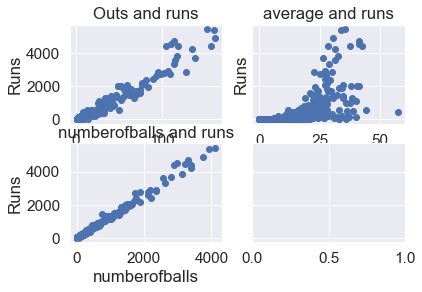

       Regressor  coefficient
0      intercept   -24.298308
1            out    -1.330846
2        average     1.373110
3  numberofballs     0.909964

MSE =6303.39247095759

Rsquared =0.9880581673688222


In [34]:
# Create two subplots and unpack the output array immediately
regressors = ['out', 'average', 'numberofballs']

runs_data_nonna = runs_data.dropna()

X_data = runs_data_nonna.drop(['batsman', 'strikerate', 'total_runs'], axis=1)
y_data = runs_data_nonna['total_runs']

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=.2,random_state=45)



f, axs = plt.subplots(2, 2, sharey=True)

axs[0,0].scatter(X_train['out'],y_train)
axs[0,0].set_title('Outs and runs')
axs[0,1].scatter(X_train['average'], y_train)
axs[0,1].set_title('average and runs')
axs[1,0].scatter(X_train['numberofballs'], y_train)
axs[1,0].set_title('numberofballs and runs')


axs[0,0].set_xlabel('Outs')
axs[0,0].set_ylabel('Runs')
axs[0,1].set_xlabel('average')
axs[0,1].set_ylabel('Runs')
axs[1,0].set_xlabel('numberofballs')
axs[1,0].set_ylabel('Runs')

plt.show()

#X_test = runs_data_test[regressors]
#y_test = runs_data_test.total_runs


ols_model = LinearRegression()

ols_model.fit(X_train, y_train)

predicted_runs = ols_model.predict(X_test)

MSE = mean_squared_error(y_test, predicted_runs)

R_squared = r2_score(y_test, predicted_runs)

ols_model_full = [ols_model.intercept_] + list(ols_model.coef_) 
regressors = ['intercept'] + regressors 

data = {'Regressor': regressors, 'coefficient': ols_model_full }


regression_stats = pd.DataFrame.from_dict(data)

print(regression_stats)
print('')
print('MSE =' + str(MSE))
print('')
print('Rsquared =' + str(R_squared))


#
#SVM application on data set

In [35]:
# Create two subplots and unpack the output array immediately
regressors = ['out', 'average']

runs_data_nonna = runs_data.dropna()

X_data = runs_data_nonna.drop(['batsman', 'strikerate', 'total_runs', 'numberofballs'], axis=1)
y_data = runs_data_nonna['total_runs']

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=.2,random_state=45)








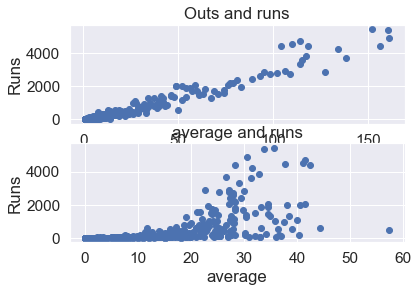

       Regressor  coefficient
0      intercept   -24.298308
1            out    -1.330846
2        average     1.373110
3  numberofballs     0.909964

MSE =30816.86709959538

Rsquared =0.9416171734798056


In [36]:
f, axs = plt.subplots(2, 1, sharey=True)

axs[0].scatter(X_train['out'],y_train)
axs[0].set_title('Outs and runs')
axs[1].scatter(X_train['average'], y_train)
axs[1].set_title('average and runs')
#axs[1,0].scatter(X_train['numberofballs'], y_train)
#axs[1,0].set_title('numberofballs and runs')


axs[0].set_xlabel('Outs')
axs[0].set_ylabel('Runs')
axs[1].set_xlabel('average')
axs[1].set_ylabel('Runs')
#axs[1,0].set_xlabel('numberofballs')
#axs[1,0].set_ylabel('Runs')

plt.show()

#X_test = runs_data_test[regressors]
#y_test = runs_data_test.total_runs


ols_model = LinearRegression()

ols_model.fit(X_train, y_train)

predicted_runs = ols_model.predict(X_test)

MSE = mean_squared_error(y_test, predicted_runs)

R_squared = r2_score(y_test, predicted_runs)

ols_model_full = [ols_model.intercept_] + list(ols_model.coef_) 
regressors = ['intercept'] + regressors 

data = {'Regressor': regressors, 'coefficient': ols_model_full }


pd.DataFrame.from_dict(data)

print(regression_stats)
print('')
print('MSE =' + str(MSE))
print('')
print('Rsquared =' + str(R_squared))

In [37]:


regressors = ['over','ball']
#y = deliviries_data['total_runs']

deliviries_data_nonna = deliviries_data.dropna()

X_data = deliviries_data.drop(['match_id', 'inning', 'batting_team', 'bowling_team',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'], axis=1)

y_data = deliviries_data['total_runs']

X_train,X_test,y_train,y_test = train_test_split(X_data, y_data, test_size=.2, random_state=45)

clf = linear_model.SGDOneClassSVM(random_state=42)

Totalruns_train = clf.fit(X_train)

Totalruns_test = clf.predict(X_test)

MSE = mean_squared_error(y_test, Totalruns_test)

R_squared = r2_score(y_test, Totalruns_test)

clf_full = list(clf.coef_)  

data = {'Regressor': regressors, 'coefficient': clf_full }


regression_stats = pd.DataFrame.from_dict(data)

print(regression_stats)
print('')
print('MSE =' + str(MSE))
print('')
print('Rsquared =' + str(R_squared))





  Regressor  coefficient
0      over     2.197470
1      ball     2.197526

MSE =3.727328568237659

Rsquared =-0.4470521512148238
